# Key Sentences Extractor
Implementation of the algorithm described in Chapter 13 of "Matrix methods in data mining and pattern recognition” by Lars Eldén 

In [0]:
import sys
import re
import nltk
import numpy as np
import re
import matplotlib.pylab as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# The paragraph we want to analyse
original_small = "October arrived, spreading a damp chill over the grounds and into the castle. Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students. Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy. The steam pouring from under her vivid hair gave the impression that her whole head was on fire. Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds. Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud. Even aside from the rain and wind it hadn't been a happy practice session. Fred and George, who had been spying on the Slytherin team, had seen for themselves the speed of those new Nimbus Two Thousand and Ones. They reported that the Slytherin team was no more than seven greenish blurs, shooting through the air like missiles."

In [0]:
original = """
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they hadn't met for several years; in fact, Mrs. Dursley pretended she didn't have a sister, because her sister and her good-for-nothing husband were as unDursleyish as it was possible to be. The Dursleys shuddered to think what the neighbors would say if the Potters arrived in the street. The Dursleys knew that the Potters had a small son, too, but they had never even seen him. This boy was another good reason for keeping the Potters away; they didn't want Dudley mixing with a child like that. When Mr. and Mrs. Dursley woke up on the dull, gray Tuesday our story starts, there was nothing about the cloudy sky outside to suggest that strange and mysterious things would soon be happening all over the country. Mr. Dursley hummed as he picked out his most boring tie for work, and Mrs. Dursley gossiped away happily as she wrestled a screaming Dudley into his high chair. None of them noticed a large, tawny owl flutter past the window. At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls. "Little tyke," chortled Mr. Dursley as he left the house. He got into his car and backed out of number four's drive. It was on the corner of the street that he noticed the first sign of something peculiar — a cat reading a map. For a second, Mr. Dursley didn't realize what he had seen — then he jerked his head around to look again. There was a tabby cat standing on the corner of Privet Drive, but there wasn't a map in sight. What could he have been thinking of? It must have been a trick of the light. Mr. Dursley blinked and stared at the cat. It stared back. As Mr. Dursley drove around the corner and up the road, he watched the cat in his mirror. It was now reading the sign that said Privet Drive — no, looking at the sign; cats couldn't read maps or signs. Mr. Dursley gave himself a little shake and put the cat out of his mind. As he drove toward town he thought of nothing except a large order of drills he was hoping to get that day. But on the edge of town, drills were driven out of his mind by something else. As he sat in the usual morning traffic jam, he couldn't help noticing that there seemed to be a lot of strangely dressed people about. People in cloaks. Mr. Dursley couldn't bear people who dressed in funny clothes — the getups you saw on young people! He supposed this was some stupid new fashion. He drummed his fingers on the steering wheel and his eyes fell on a huddle of these weirdos standing quite close by. They were whispering excitedly together. Mr. Dursley was enraged to see that a couple of them weren't young at all; why, that man had to be older than he was, and wearing an emerald-green cloak! The nerve of him! But then it struck Mr. Dursley that this was probably some silly stunt — these people were obviously collecting for something... yes, that would be it. The traffic moved on and a few minutes later, Mr. Dursley arrived in the Grunnings parking lot, his mind back on drills. Mr. Dursley always sat with his back to the window in his office on the ninth floor. If he hadn't, he might have found it harder to concentrate on drills that morning. He didn't see the owls swoop ing past in broad daylight, though people down in the street did; they pointed and gazed open- mouthed as owl after owl sped overhead. Most of them had never seen an owl even at nighttime. Mr. Dursley, however, had a perfectly normal, owl-free morning. He yelled at five different people. He made several important telephone calls and shouted a bit more. He was in a very good mood until lunchtime, when he thought he'd stretch his legs and walk across the road to buy himself a bun from the bakery. He'd forgotten all about the people in cloaks until he passed a group of them next to the baker's. He eyed them angrily as he passed. He didn't know why, but they made him uneasy. This bunch were whispering excitedly, too, and he couldn't see a single collecting tin. It was on his way back past them, clutching a large doughnut in a bag, that he caught a few words of what they were saying. "The Potters, that's right, that's what I heard yes, their son, Harry" Mr. Dursley stopped dead. Fear flooded him. He looked back at the whisperers as if he wanted to say something tothem, but thought better of it. 
"""

In [0]:
# Split into sentences, remove trailing spaces, remove symbols and make everything lower case  

sentences = re.compile("[\.\?\!]").split(original)

sentences[:] = [sentence.strip() for sentence in sentences]
sentences[:] = [re.sub('[^\w\d\s]', '', sentence) for sentence in sentences]
sentences[:] = [sentence.lower() for sentence in sentences]

print("number of sentences: " + str(len(sentences)))

number of sentences: 85


In [0]:
# Stop words we need to remove from the paragraph

stop_words = stopwords.words('english')
stop_words[:] = [re.sub('[^\w\d\s]', '', word) for word in stop_words]
stop_words[:] = [word.lower() for word in stop_words]

print("number of stop words: " + str(len(stop_words)))

number of stop words: 179


In [0]:
# Remove stop words

unique_words = set()

for sentence in sentences:
  for word in sentence.split():
    if word not in stop_words:
      unique_words.add(word)

print("number of unique words: " + str(len(unique_words)))

number of unique words: 327


In [0]:
# Stem words

row_set = set()
stemmer = PorterStemmer()

for word in unique_words:
  row_set.add(stemmer.stem(word))

print("number of rows: " + str(len(row_set)))

number of rows: 306


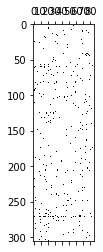

In [0]:
# Generate text matrix

def calculate_frequency(sentence, word):
  counter = 0;
  for element in sentence.split():
    if word in element:
      counter += 1
  return counter

row_list = list(row_set)

matrix = np.zeros((len(row_list), len(sentences)), dtype=int)

for row in range(len(row_list)):
  for column in range(len(sentences)):
    matrix[row][column] = calculate_frequency(sentences[column], row_list[row])

plt.spy(matrix)

In [0]:
# Compute the SVD

u, s, v = np.linalg.svd(matrix)

In [0]:
# Find the top ten highest values in the first row

u_1 = u[:,1]

top_ten = list()

for i in range(10):
  maxval = max(u_1)
  top_ten.append(np.where(u_1 == maxval))
  u_1 = np.delete(u_1, np.where(u_1 == maxval))

print(top_ten)

[(array([304]),), (array([16]),), (array([229]),), (array([237]),), (array([102]),), (array([38]),), (array([146]),), (array([191]),), (array([233]),), (array([191]),)]


In [0]:
# Print the important words

counter = 0
important_words = list()
for locarr in top_ten:
  for loc in np.nditer(locarr):
    important_words.append(row_list[loc])
    counter += 1
    if counter == 10:
      break
  if counter == 10:
    break
  
print(important_words)

['ing', 'sign', 'much', 'cloudi', 'bag', 'blond', 'bakeri', 'call', 'child', 'call']


In [0]:
# Print sentences with important words

importance_list = list()
for column in range(len(sentences)):
  importance = 0
  for row in range(len(row_list)):
    if row_list[row] in important_words:
      importance += matrix[row][column]
  importance_list.append(importance)

find_top = importance_list
for i in range(5):
  most_imp = max(find_top)
  index = importance_list.index(most_imp)
  find_top.remove(most_imp)
  print(sentences[index])

it was now reading the sign that said privet drive  no looking at the sign cats couldnt read maps or signs
dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors
the dursleys knew that the potters had a small son too but they had never even seen him
when mr
little tyke chortled mr


### TMG 

* https://web.ics.purdue.edu/~ekontopo/presentations/Athens2011_TMG.pdf

# References
* https://chrisalbon.com/machine_learning/preprocessing_text/remove_stop_words/
* https://medium.com/towards-artificial-intelligence/text-mining-in-python-steps-and-examples-78b3f8fd913b
* https://stackoverflow.com/questions/903853/how-do-you-extract-a-column-from-a-multi-dimensional-array